<a href="https://colab.research.google.com/github/dagyaom/Python_Practice/blob/main/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%97%B0%EC%8A%B5_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EC%B6%94%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HTML


- 웹 페이지에서 보여지는 것들이 어떻게 어떤 방식으로 보여져야 하는지 알려주는 마크업 언어

## HTML Element
-head
-body
-div
-li
....

각 엘레먼트들은 태그를 통해 표현된다. 
- opening tag와 closing tag

opening tag만 있는 것도 있다. 
- 빈 줄을 추가하는 \<br>
- 수평으로 줄긋은 \<hr>

## HTML Children
하나의 html요소 안에 다른 요소를 추가할 수 있다. 

# CSS 

HTML 이 표현한 문서가 어떻게 표현이 되는지 알려주는 스타일시트 언어


## CSS Selector
- Type selector : p, div ...
- Class selector : class
- Id selector : id

### 1) CSS는 요소의 위치에 따라 상위 요소의 스타일을 상속받는다. 
```
<div style="color:red">
    <p>I have no style</p>
</div>
```

- p 태그는 아무런 스타일이 적용이 되어 있지 않지만 상위 요소인 div 의 영향을 받게 된다.

### 2) 동시에 여러 개의 요소들에 대한 스타일을 정할 때에는 보통 클래스를 지정해서 상속을 받도록 정한다.
```
<p class="banana">I have a banana class</p>
```
```
.banana {
    color:"yellow";
}
```
- 한번에 3개의 클래스를 동시에 부여할 수 있다. 그리고 CSS 에서는 따로따로 클래스를 정의해 스타일을 지정할 수가 있다.
```
<p class="banana fruit orange">I have many classes</p>
```



### 3)  ID 는 보통 특정 HTML 요소를 가리킬 때에만 사용된다. https://bangu4.tistory.com/26





# DOM(Document Object Model)




크롤링 읽어보기

https://hogni.tistory.com/21
https://victorydntmd.tistory.com/245
https://doubly12f.tistory.com/64


# get_movie_code

In [ ]:
reviews = [{'review_text': 'Wow...!', 'review_star': 7},
           {'review_text': 'Okay movie', 'review_star': 6}]

a = []
for review in reviews:
    print(review)
    a.append(review)
print(a)
# sum(a)
len(reviews)

{'review_text': 'Wow...!', 'review_star': 7}
{'review_text': 'Okay movie', 'review_star': 6}
[{'review_text': 'Wow...!', 'review_star': 7}, {'review_text': 'Okay movie', 'review_star': 6}]


2

In [ ]:
BASE_URL = "https://movie.naver.com/movie"

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
def get_movie_code(movie_title):
    """
    get_movie_code 함수는 영화 제목을 받으면 해당 영화 제목으로 검색했을 때
    가장 먼저 나오는 영화의 아이디를 리턴합니다.

    해당 영화의 아이디는 네이버에서 지정한대로 사용합니다. 
    여기에서 네이버에서 지정한 아이디란 예를 들어 다음과 같습니다:
        - `https://movie.naver.com/` 에 접속
        - 검색란에 영화 제목 (예: Soul) 입력 뒤 검색
        - 해당 영화 페이지의 URL (예: `https://movie.naver.com/movie/bi/mi/basic.nhn?code=184517`) 의 'code=' 뒤에 나오는 숫자

    파라미터:
        - movie_title: 리뷰를 스크레이핑할 영화 제목이 담긴 문자열(str) 입니다.

    리턴:
        - 영화 아이디 번호: 네이버에서 지정한 영화의 아이디 번호가 담긴
        숫자(int) 입니다.
    """
    search_url = f"{BASE_URL}/search/result.naver?query={movie_title}&section=all&ie=utf8"  # f : 문자열 포매팅 https://blockdmask.tistory.com/429
    page = requests.get(search_url)
    soup = BeautifulSoup(page.content, 'html.parser')
    movie_elements = soup.find('p', class_ = 'result_thumb').find('a')['href']
    numbers = re.findall("\d+", movie_elements)
    movie_code = int(numbers[0])

    return movie_code

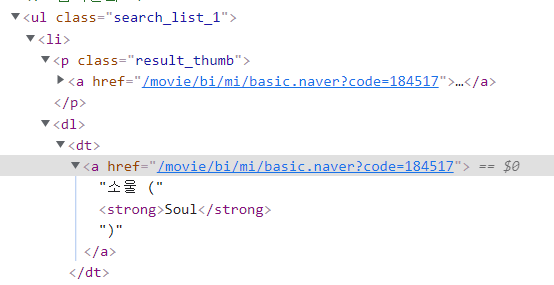

In [ ]:
movie_title = 'Soul'
search_url = f"{BASE_URL}/search/result.naver?query={movie_title}&section=all&ie=utf8"  # 이걸 통해서 code를 받아온다. 

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
page = requests.get(search_url)  # 일단은 주소를 받아서.
soup = BeautifulSoup(page.content, 'html.parser')  #뷰티풀숲으로 파싱을 하고,
movie_elements = soup.find('p', class_ = 'result_thumb').find('a')['href']
numbers = re.findall("\d+", movie_elements)
int(numbers[0])

184517

# get_reviews 

In [ ]:
def get_reviews(movie_code, page_num=1):
    """
    get_reviews 함수는 리뷰들이 담긴 리뷰 리스트를 리턴해주는 함수입니다.

    각 리뷰는 다음과 같은 파이썬 딕셔너리 형태입니다:
        {
            'review_text': 리뷰 글이 담긴 문자열(str) 입니다,
            'review_star': 리뷰 별점이 담긴 숫자(int) 입니다
        }

    파라미터:
        - movie_code: 네이버에서 지정한 영화 아이디 번호가 담긴 숫자(int)
        입니다.
        - page_num: 리뷰를 몇 번째 리뷰 페이지에서 가져와야 하는지 담긴
        숫자(int) 입니다. 아무것도 주어지지 않은 경우 기본값은 1 입니다.

    리턴:
        - 리뷰 리스트: 스크레이핑한 리뷰들이 각각 파이썬 딕셔너리로 위에 명시된
        형태로 저장된 리스트입니다.
    """
    review_url = f"{BASE_URL}/point/af/list.naver?st=mcode&sword={movie_code}&target=after&page={page_num}"
    review_list = []

    # 별점빼기.
    page = requests.get(review_url)  # 일단은 주소를 받아서.
    soup = BeautifulSoup(page.content, 'html.parser')  #뷰티풀숲으로 파싱을 하고,

    movie_elements = soup.find_all('div', class_ = 'list_netizen_score')   #bs4.element.ResultSet 객체로 리턴된다. 
    list_review_star = []
    for i in range(len(movie_elements)) :   # 갯수만큼 for문을 돌려서, 
        movie_star=movie_elements[i].contents[2]  # 2번째에 위치한 컨텐츠를 꺼낸다. 
        movie_str = str(movie_star)  # bs4.element.Tag로 반환되는데 문자열로 변경 후 re정규표현식에 넣어서 숫자만 꺼내준다. 
        numbers = re.findall("\d+", movie_str)  #re 정규표현식은 문자 or 바이트류 객체만 받는다. 
        review_star = int(numbers[0])
        list_review_star.append(review_star)
    # print(list_review_star)

    # 리뷰빼기.

    movie_elements = soup.find_all('td', class_ = 'title')
    list_review_text = []
    for i in range(len(movie_elements)):
        sentence = movie_elements[i].contents[6]
        review_text = ' '.join(sentence.split())
        list_review_text.append(review_text)
    # print(list_review_text)

    for i in range(len(list_review_text)):  #for문을 갯수만큼 돌려서
        # print(i)
        dt_movie = dict()    # 빈 딕셔너리
        dt_movie['review_text'] = list_review_text[i]   #딕셔너리에 텍스트 넣고
        dt_movie['review_star'] = list_review_star[i]    #star도 넣고
        # print(dt_movie)
        review_list.append(dt_movie)  # 빈 리스트에 딕셔너리를 추가한다. 

    return review_list

In [ ]:
BASE_URL = "https://movie.naver.com/movie"
review_url = f"{BASE_URL}/point/af/list.naver?st=mcode&sword=184517&target=after&page=1"
# review_url = https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=184517&target=after&page=1

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
page = requests.get(review_url)  # 일단은 주소를 받아서.
soup = BeautifulSoup(page.content, 'html.parser')  #뷰티풀숲으로 파싱을 하고,

movie_elements = soup.find_all('div', class_ = 'list_netizen_score')

# type(movie_elements)  ## 리턴된 타입은 bs4.element.ResultSet 객체 입니다 --> find 나 select 는 단일 객체만 사용가능. 
# type(movie_elements[1])  ## 리턴된 타입은 bs4.element.Tag 객체 입니다

movie=movie_elements[0].contents[2]  # movie_elements의 0번째 Tag를 꺼낸다. 그리고 2번째 내용물(별점)을 꺼낸다.    https://victorydntmd.tistory.com/245
movie_str = str(movie)  # bs4.element.Tag로 반환되는데 문자열로 변경 후 re정규표현식에 넣어서 숫자만 꺼내준다.
numbers = re.findall("\d+", movie_str)
int(numbers[0])
# numbers
# movie_elements.string('em')
# movie_element = movie_elements.select('em')
# numbers = re.findall("\d+", movie_elements)
# int(numbers[0])


1

In [ ]:
len(movie_elements)

10

In [ ]:
movie_elements[0].contents[2]

<em>1</em>

In [ ]:
type(movie_elements[0].contents[2])

bs4.element.Tag

In [ ]:
movie_str

'<em>10</em>'

In [ ]:
# 일단 별점은 완성.
import requests
from bs4 import BeautifulSoup
import re
page = requests.get(review_url)  # 일단은 주소를 받아서.
soup = BeautifulSoup(page.content, 'html.parser')  #뷰티풀숲으로 파싱을 하고,

movie_elements = soup.find_all('div', class_ = 'list_netizen_score')   #bs4.element.ResultSet 객체로 리턴된다. 

for i in range(len(movie_elements)) :   # 갯수만큼 for문을 돌려서, 
    movie_star=movie_elements[i].contents[2]  # 2번째에 위치한 컨텐츠를 꺼낸다. 
    movie_str = str(movie_star)  # bs4.element.Tag로 반환되는데 문자열로 변경 후 re정규표현식에 넣어서 숫자만 꺼내준다. 
    numbers = re.findall("\d+", movie_str)  #re 정규표현식은 문자 or 바이트류 객체만 받는다. 
    review_star = int(numbers[0])
    print(review_star)

1
10
10
10
10
8
10
9
10
10


In [ ]:
movie_elements[0]

<div class="list_netizen_score">
<span class="st_off"><span class="st_on" style="width:10%">별점 - 총 10점 중</span></span><em>1</em>
</div>

In [ ]:
movie_elements[0].string # 왜 이게 안될까. 가져올 문자가 여러개라서 안되는걸까


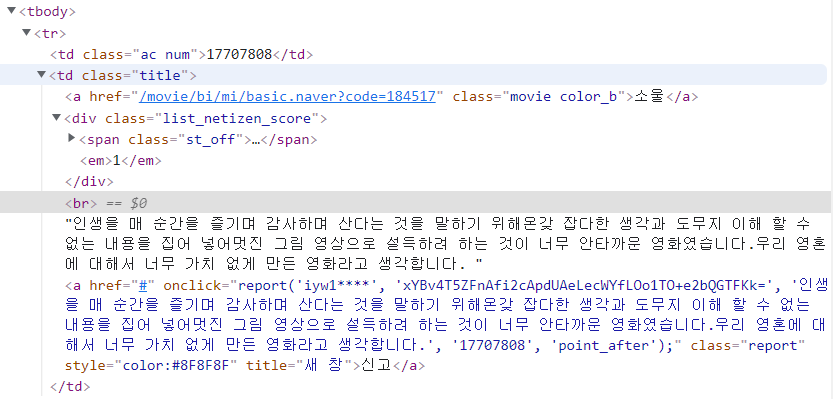

In [ ]:
# 이제 리뷰를 빼내보자. title class에서 contents만 빼내도 되고, a herf에서 onclick속성값만 빼낸 후 re정규식으로 문자열만 빼낼수도 있다. 

import requests
from bs4 import BeautifulSoup
import re
page = requests.get(review_url)  # 일단은 주소를 받아서.
soup = BeautifulSoup(page.content, 'html.parser')  #뷰티풀숲으로 파싱을 하고,

movie_elements = soup.find_all('td', class_ = 'title')
for i in range(len(movie_elements)):
    sentence = movie_elements[i].contents[6]
    review_text = ' '.join(sentence.split())
    print(review_text)

인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다.우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다.
진짜 완전 대박 짱
수단이 목적이 되려고 할 때 기억할 영화.


"소울" 그 자체는 자유롭지만 결국 자리는 정해져있어
너무 귀여워요 인생영화
영상미가 돋보이고 귀엽다 애니에서 철학이라니.. 대단
요약 : 개똥 밭에 굴러도 이승이 낫다. 그러니 즐겁게 살자.



In [ ]:
sentence = movie_elements[5].contents[6]     #  bs4.element.NavigableString. 쓸데없는 띄워쓰기가 너무 많다.
print(sentence.split())  #이렇게 하면 스페이스 기준으로 문장을 나눠서 리스트에 담아준다. 
sentence1 = ' '.join(sentence.split())  # 모든 공백을 제거하고 싶다면 이렇게..!
sentence1

['"소울"', '그', '자체는', '자유롭지만', '결국', '자리는', '정해져있어']


'"소울" 그 자체는 자유롭지만 결국 자리는 정해져있어'

In [ ]:
movie_elements[0].string #태그 내 자식 태그가 둘이상이라서 무엇을 반환해야 하는지 명확하지 않아 None을 반환함. 

In [ ]:
# class title안에 a class가 또 하나 있는데, 여기서도 뺴내올 수 있다. 
movie_elements[0].contents[7]  

<a class="report" href="#" onclick="report('iyw1****', 'y9rtHjqXmbaqGv+vNnSG9MpzHc5+6U95LMUlW8ISb7Q=', '인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다.우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다.', '17707808', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>

In [ ]:
# 아래와 같은 방법도 있다. 

movie_elements = soup.find_all('a', class_ = 'report')
for i in range(len(movie_elements)):
    # print(movie_elements[i]['onclick'])  # onclick 속성값 빼내기.
    string = movie_elements[i]['onclick']  # 문자열로 반환된다. 
    recompile = re.compile('[가-힣]+').findall(string)   # 한글만 추출. 하지만 이 경우 영어리뷰는 안담긴다는 단점이 있네.
    print(" ".join(recompile))    # 리스트를 구분자를 줘서 문자열로 반환.

인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다 우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다
진짜 완전 대박 짱
수단이 목적이 되려고 할 때 기억할 영화


소울 그 자체는 자유롭지만 결국 자리는 정해져있어
너무 귀여워요 인생영화
영상미가 돋보이고 귀엽다 애니에서 철학이라니 대단
요약 개똥 밭에 굴러도 이승이 낫다 그러니 즐겁게 살자



In [ ]:
# 연습
str=movie_elements[1]['onclick']
recompile = re.compile('[가-힣]+').findall(str)  # 한글만 추출. 하지만 이 경우 영어리뷰는 안담긴다는 단점이 있네.
print(" ".join(recompile))  # 리스트를 구분자를 줘서 문자열로 반환.

진짜 완전 대박 짱


In [ ]:
# 별점빼기.
import requests
from bs4 import BeautifulSoup
import re
page = requests.get(review_url)  # 일단은 주소를 받아서.
soup = BeautifulSoup(page.content, 'html.parser')  #뷰티풀숲으로 파싱을 하고,

movie_elements = soup.find_all('div', class_ = 'list_netizen_score')   #bs4.element.ResultSet 객체로 리턴된다. 
list_review_star = []
for i in range(len(movie_elements)) :   # 갯수만큼 for문을 돌려서, 
    movie_star=movie_elements[i].contents[2]  # 2번째에 위치한 컨텐츠를 꺼낸다. 
    movie_str = str(movie_star)  # bs4.element.Tag로 반환되는데 문자열로 변경 후 re정규표현식에 넣어서 숫자만 꺼내준다. 
    numbers = re.findall("\d+", movie_str)  #re 정규표현식은 문자 or 바이트류 객체만 받는다. 
    review_star = int(numbers[0])
    list_review_star.append(review_star)

list_review_star

NameError: ignored

In [ ]:
# 리뷰빼기.

movie_elements = soup.find_all('td', class_ = 'title')

list_review_text = []
for i in range(len(movie_elements)):
    sentence = movie_elements[i].contents[6]
    review_text = ' '.join(sentence.split())
    list_review_text.append(review_text)

list_review_text
# 이걸 어떻게 딕셔너리로 묶을까?
# 일단 키값을 넣고... 

    # 각 리뷰는 다음과 같은 파이썬 딕셔너리 형태입니다:

            # 'review_text': 리뷰 글이 담긴 문자열(str) 입니다,
            # 'review_star': 리뷰 별점이 담긴 숫자(int) 입니다



['인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다.우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다.',
 '진짜 완전 대박 짱',
 '수단이 목적이 되려고 할 때 기억할 영화.',
 '',
 '',
 '"소울" 그 자체는 자유롭지만 결국 자리는 정해져있어',
 '너무 귀여워요 인생영화',
 '영상미가 돋보이고 귀엽다 애니에서 철학이라니.. 대단',
 '요약 : 개똥 밭에 굴러도 이승이 낫다. 그러니 즐겁게 살자.',
 '']

In [ ]:
review_list = []  #빈 리스트


for i in range(len(list_review_text)):  #for문을 갯수만큼 돌려서
    # print(i)
    dt_movie = dict()    #빈 딕셔너리
    dt_movie['review_text'] = list_review_text[i]   #딕셔너리에 텍스트 넣고
    dt_movie['review_star'] = list_review_star[i]    #star도 넣고
    # print(dt_movie)
    review_list.append(dt_movie)  #빈 리스트에 딕셔너리를 추가한다. 

print(review_list)


### 해냈어!!!!!!!!!!!!!!!!!!!!! 

[{'review_text': '인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다.우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다.', 'review_star': 1}, {'review_text': '진짜 완전 대박 짱', 'review_star': 10}, {'review_text': '수단이 목적이 되려고 할 때 기억할 영화.', 'review_star': 10}, {'review_text': '', 'review_star': 10}, {'review_text': '', 'review_star': 10}, {'review_text': '"소울" 그 자체는 자유롭지만 결국 자리는 정해져있어', 'review_star': 8}, {'review_text': '너무 귀여워요 인생영화', 'review_star': 10}, {'review_text': '영상미가 돋보이고 귀엽다 애니에서 철학이라니.. 대단', 'review_star': 9}, {'review_text': '요약 : 개똥 밭에 굴러도 이승이 낫다. 그러니 즐겁게 살자.', 'review_star': 10}, {'review_text': '', 'review_star': 10}]


In [ ]:
len(list_review_star)

10

In [ ]:
print(list_review_text)

[]


In [ ]:
lists = []
dt_movie = dict() #빈 딕셔너리

for i in range(len(review_text)):
    dt_movie['review_text'] = list_review_text[i]
    dt_movie['review_star'] = list_review_star[i]


In [ ]:
print(dt_movie)
dt_movie['review_text'] = list_review_text[0]
dt_movie['review_star'] = list_review_star[0]


lists.append(dt_movie)
lists

{}


[{'review_star': 1,
  'review_text': '인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다.우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다.'},
 {'review_star': 1,
  'review_text': '인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다.우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다.'}]

In [ ]:
review_text

''

# scrape_by_review_num


https://ai-creator.tistory.com/201

In [ ]:
def scrape_by_review_num(movie_title, review_num):
    """
    scrape_by_review_num 함수는 총 스크레이핑할 리뷰 개수를 받아 해당 개수만큼
    리뷰 항목이 담긴 리뷰 리스트를 리턴합니다.

    파라미터:
        - movie_title: 리뷰를 스크레이핑할 영화 제목이 담긴 문자열(str) 입니다.
        - review_num: 총 몇 개의 리뷰를 가져올지 정해주는 숫자(int) 입니다.

    리턴:
        - 리뷰 리스트: 주어진 review_num 만큼의 리뷰 항목을 담은 파이썬
        리스트입니다. (각 리뷰 항목은 get_reviews 에서 명시된 파이썬 딕셔너리
        형태여야 합니다.)
    """
    reviews = []

    movie_code =  get_movie_code(movie_title)  # 이전에 만든 get_movie_code 함수 활용.
    review_url1 = f"{BASE_URL}/point/af/list.naver?st=mcode&sword={movie_code}"

    res = requests.get(review_url1)  # html 문서를 받아와서
    soup = BeautifulSoup(res.text, 'html.parser')  #파싱
    div = soup.find('strong', class_="c_88 fs_11").string  # 평점 총갯수를 꺼냄. 그럼 총 몇페이지인지 알수있다. 
    
    import math    # 총 페이지 갯수를 구하기 위해 올림이 필요.
    page_number = math.ceil(int(div)/10)  # 평점갯수/10 --> 올림.  # 이렇게 총 페이지 갯수를 받아온다.  # div = class 'bs4.element.NavigableString'--> int형변환 해줘야 math함수에 넣을 수 있다. 
    # print(page_number)

    # page_number = 3  # 함수 실험을 위한 임의지정

    reviews = []  # 빈 리스트

    for page_num in range(1, page_number+1):
        if len(reviews) >= review_num :   # break를 두번 걸어줘야 했다. 이중 for문이기 때문. 아래 for에서는 break가 걸려도 위 for문으로 다시 돈다. 
            break
        # print('page_num ' , page_num)
        get_re = get_reviews(movie_code, page_num)  #일단 여기에서 1페이지의 [{:, :},{:, :} x10 ]를 얻는데.. 
        # print('get_re ', get_re)

        for rev in get_re:   #그걸 for문을 돌려서 딕셔너리 하나하나를 꺼낸다. 
            reviews.append(rev)  #딕셔너리 하나하나를 빈 reviews리스트에 담는다. 10개를 다 담고나면 다시 for문으로 돌아가서 2페이지의 딕셔너리를 추가한다. 
            # print('reviews ', reviews)
            # print('리스트 개수: ', len(reviews))
            if len(reviews) >= review_num  : # 만약 reviews리스트의 갯수가 구하고자 하는 리뷰 갯수와 일치한다면 멈춘다. 
                break
    # print(reviews)
    


    return reviews  # reviews는 원하는 갯수만큼의 리뷰 수가 딕셔너리 형태로 담겨있다. 


In [ ]:
len(scrape_by_review_num('Soul', 8))

8

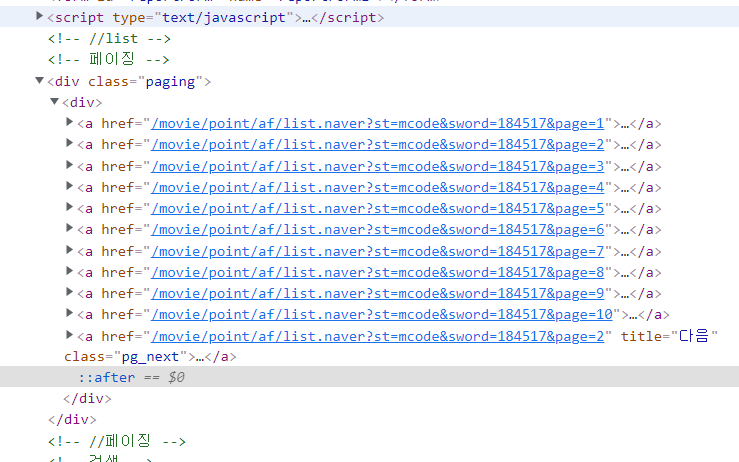

In [ ]:
review_url = f"{BASE_URL}/point/af/list.naver?st=mcode&sword={movie_code}&target=after&page={page_num}"

In [ ]:
BASE_URL = "https://movie.naver.com/movie"

In [ ]:
https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=184517

In [ ]:
# movie_title 을 쳐서 리뷰를 얻기 위해서는...
# 일단 타이틀을 통해 code번호를 알아내야 하고... --> 위에서 함수를 통해 구현함.
# 평점 리스트를 보면 한 페이지당 10개의 평점이 있고, 총 9,836개의 평점이 있다.  --> 총 페이지 갯수는 984페이지


import requests
from bs4 import BeautifulSoup
import re

review_num = 18
movie_title = 'Soul'
movie_code =  get_movie_code(movie_title)  # 이전에 만든 get_movie_code 함수 활용

review_url1 = f"{BASE_URL}/point/af/list.naver?st=mcode&sword={movie_code}"
res = requests.get(review_url1)
soup = BeautifulSoup(res.text, 'html.parser')
div = soup.find('strong', class_="c_88 fs_11").string  # 평점 총갯수를 꺼냄. 그럼 총 몇페이지인지 알수있다.  #class 'bs4.element.NavigableString'--> int형변환 해줘야 math함수에 넣을 수 있다. 
import math
page_number = math.ceil(int(div)/10)  # 평점갯수/10 --> 올림.  #이렇게 총 페이지 갯수를 받아온다. 
print(page_number)

page_number = 3  # 임의지정

reviews = []
for page_num in range(1, page_number+1):
    if len(reviews) >= review_num :
        break
    print('page_num ' , page_num)
    get_re = get_reviews(movie_code, page_num)  #일단 여기에서 1페이지의 [{:, :},{:, :} x10 ]를 얻는데.. 
    print('get_re ', get_re)

    for rev in get_re:   #그걸 for문을 돌려서 딕셔너리 하나하나를 꺼낸다. 
        reviews.append(rev)  #딕셔너리 하나하나를 빈 reviews리스트에 담는다. 10개를 다 담고나면 다시 for문으로 돌아가서 2페이지의 딕셔너리를 추가한다. 
        print('reviews ', reviews)
        print('리스트 개수: ', len(reviews))
        if len(reviews) >= review_num  : # 만약 reviews리스트의 갯수가 구하고자 하는 리뷰 갯수와 일치한다면 멈춘다. (== 는 이상하게 명령이 잘 안먹힐때가 많다.. )
            break
print(reviews)
    


    # link = f"{BASE_URL}/point/af/list.naver?st=mcode&sword={movie_code}&target=after&page={page_num}"
    # resp = requests.get(link)
    # soup = BeautifulSoup(resp.text, 'html.parser')
    # div = soup.find





# res = requests.get(review_num_url)
# soup = BeautifulSoup(res.text, 'html.parser')
# div= soup.find('div', class_='paging')
# print(div)
# print('-------------')
# a_list = div.find_all("a")
# print(a_list)
# print('-------------')


984
page_num  1
get_re  [{'review_text': '', 'review_star': 10}, {'review_text': '인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다.우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다.', 'review_star': 1}, {'review_text': '진짜 완전 대박 짱', 'review_star': 10}, {'review_text': '수단이 목적이 되려고 할 때 기억할 영화.', 'review_star': 10}, {'review_text': '', 'review_star': 10}, {'review_text': '', 'review_star': 10}, {'review_text': '"소울" 그 자체는 자유롭지만 결국 자리는 정해져있어', 'review_star': 8}, {'review_text': '너무 귀여워요 인생영화', 'review_star': 10}, {'review_text': '영상미가 돋보이고 귀엽다 애니에서 철학이라니.. 대단', 'review_star': 9}, {'review_text': '요약 : 개똥 밭에 굴러도 이승이 낫다. 그러니 즐겁게 살자.', 'review_star': 10}]
reviews  [{'review_text': '', 'review_star': 10}]
리스트 개수:  1
reviews  [{'review_text': '', 'review_star': 10}, {'review_text': '인생을 매 순간을 즐기며 감사하며 산다는 것을 말하기 위해온갖 잡다한 생각과 도무지 이해 할 수 없는 내용을 집어 넣어멋진 그림 영상으로 설득하려 하는 것이 너무 안타까운 영화였습니다.우리 영혼에 대해서 너무 가치 없게 만든 영화라고 생각합니다.', 'review_star': 1}]
리스트 개수:  2
review

In [ ]:
len(reviews)

18

In [ ]:
review_url2 = f"{BASE_URL}/point/af/list.naver?st=mcode&sword={movie_code}&target=after&page={page_num}"
review_url2

'https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=184517&target=after&page=984'

In [ ]:
https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=184517

In [ ]:
# 연습1) 
url = "https://movie.naver.com/movie/bi/mi/review.nhn?code=191633"
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
div = soup.find('div', class_='paging')
print(type(div))   # <class 'bs4.element.Tag'>
a_list = div.find_all("a")   #a 태그로 찾기.
print(type(a_list))   # <class 'bs4.element.ResultSet'> 에서는 find, find_all을 쓸수없음. 
a_list

<class 'bs4.element.Tag'>
<class 'bs4.element.ResultSet'>


[<a href="/movie/bi/mi/review.naver?code=191633&amp;page=1" id="pagerTagAnchor1" onclick="clickcr(this, 'rli.page', '', '', event);"><span class="on">1</span></a>,
 <a href="/movie/bi/mi/review.naver?code=191633&amp;page=2" id="pagerTagAnchor2" onclick="clickcr(this, 'rli.page', '', '', event);"><span>2</span></a>,
 <a href="/movie/bi/mi/review.naver?code=191633&amp;page=3" id="pagerTagAnchor3" onclick="clickcr(this, 'rli.page', '', '', event);"><span>3</span></a>,
 <a class="pg_next" href="/movie/bi/mi/review.naver?code=191633&amp;page=2" id="pagerTagAnchor2" onclick="clickcr(this, 'rli.page', '', '', event);" title="다음"><em>다음</em></a>]

In [ ]:
# 연습1) 
url = "https://movie.naver.com/movie/bi/mi/review.nhn?code=191633"
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
div = soup.find('div', class_='paging')
# print(type(div))   # <class 'bs4.element.Tag'>
a_list = div.find_all("a")   #a 태그로 찾기.
# print(type(a_list))   # <class 'bs4.element.ResultSet'> 에서는 find, find_all을 쓸수없음. 

all_review = pd.DataFrame()  # 빈 데이터프레임
for a in a_list:  # 루프문
    print(a['href'], a.string)  # 속성값 'href'의 문자열 빼내기.

/movie/bi/mi/review.naver?code=191633&page=1 1
/movie/bi/mi/review.naver?code=191633&page=2 2
/movie/bi/mi/review.naver?code=191633&page=3 3
/movie/bi/mi/review.naver?code=191633&page=2 다음


In [ ]:
# 연습1) 
url = "https://movie.naver.com/movie/bi/mi/review.nhn?code=191633"
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
div = soup.find('div', class_='paging')
# print(type(div))   # <class 'bs4.element.Tag'>
a_list = div.find_all("a")   #a 태그로 찾기.
# print(type(a_list))   # <class 'bs4.element.ResultSet'> 에서는 find, find_all을 쓸수없음. 

for a in a_list:  # 루프문
    print(a['href'], a.string)  # 속성값 'href'의 문자열 빼내기.
    if a.string == '다음' or a.string == '이전':
        continue    # 다시 for문으로 돌아가는데,더이상 돌게 없으면 중지됨.
    else:
        page_url = "https://movie.naver.com" + a['href']  #문자열 붙이기.
        print(page_url)

/movie/bi/mi/review.naver?code=191633&page=1 1
https://movie.naver.com/movie/bi/mi/review.naver?code=191633&page=1
/movie/bi/mi/review.naver?code=191633&page=2 2
https://movie.naver.com/movie/bi/mi/review.naver?code=191633&page=2
/movie/bi/mi/review.naver?code=191633&page=3 3
https://movie.naver.com/movie/bi/mi/review.naver?code=191633&page=3
/movie/bi/mi/review.naver?code=191633&page=2 다음


# scrape_by_page_num

In [ ]:
def scrape_by_page_num(movie_title, page_num=10):
    """
    scrape_by_page_num 함수는 페이지 <갯수>를 기준으로 리뷰를 스크레이핑하는
    함수입니다.

    파라미터:
        - movie_title: 리뷰를 스크레이핑할 영화 제목이 담긴 문자열(str) 입니다.
        - page_num: 첫 번째 페이지에서부터 스크레이핑할 페이지 개수가 담긴
        숫자(int) 입니다.

    리턴:
        - 리뷰 리스트: 주어진 page_num 만큼의 페이지에서부터 스크레이핑한
        리뷰를 담은 파이썬 리스트입니다. (각 리뷰 항목은 get_reviews 에서
        명시된 파이썬 딕셔너리 형태여야 합니다.)
    """
    
    movie_code = get_movie_code(movie_title)
    link = f"{BASE_URL}/point/af/list.naver?st=mcode&sword={movie_code}"
    resp = requests.get(link)

    soup = BeautifulSoup(resp.text, 'html.parser')
    div = soup.find('strong', class_="c_88 fs_11").string  # 평점 총갯수를 꺼냄. 그럼 총 몇페이지인지 알수있다. 
    
    import math    # 총 페이지 갯수를 구하기 위해 올림이 필요.
    page_number = math.ceil(int(div)/10)  # 평점갯수/10 --> 올림.  # 이렇게 총 페이지 갯수를 받아온다.  # div = class 'bs4.element.NavigableString'--> int형변환 해줘야 math함수에 넣을 수 있다. 
    # print(page_number) # page_number = 총 페이지 갯수
    
    reviews = []  # 빈 리스트

    for i in range(1, page_number+1) : 
        if i > page_num:
            break
        else:
            rev = get_reviews(movie_code, i)
            for r in rev:
                reviews.append(r)
    
    return reviews

In [ ]:
len(scrape_by_page_num('부산행', 2))

20

In [ ]:
reviews = []
movie_title = 'Soul'
page_num = 10
    
movie_code = get_movie_code(movie_title)
review_url = f"{BASE_URL}/point/af/list.naver?st=mcode&sword={movie_code}&target=after&page={page_num}"
resp = requests.get(review_url)
soup = BeautifulSoup(resp.content, 'html.parser')
get_reviews(movie_code, page_num)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="평점 : 네이버 영화" property="og:title"/>
<meta content="네티즌 평점과 리뷰 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/point/af/list.naver?st=mcode&amp;sword=184517&amp;target=after&amp;page=10" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og: